In [1]:
# for creating a responsive plot
# %matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import csv
from datetime import datetime
from os import mkdir, listdir

import pandas as pd

In [3]:
# -------- range of the variables ----------
range_D     = [0.5, 0.8]
range_AEdAO = [0.3, 1.05]
range_PdD   = [0.5, 1.4]
range_Z     = [2, 7]

list_Z = range(range_Z[0], range_Z[1]+1)

In [4]:
dir_name = 'scans_with_constraints'

# V_S = '7_0'
# V_S = '7_5'
V_S = '8_0'
# V_S = '8_5'

dir_name += '/'+V_S
# dir_name = V_S

In [5]:
# # create dataframes from csv's
# dfs = {}

# # columns names
# col_names = ['D', 'AEdAO', 'PdD', 'Z', 'P_B', 't075dD','tmin075dD', 'tal07R','cavLim', 'Vtip','Vtipmax']
# # col_names = ['D', 'AEdAO', 'PdD', 'Z', 'P_B', 'strength','strengthMin', 'cavitation','cavitationMax', 'velocity','velocityMax']

# # for filename in listdir(dir_name):
# for z in range(2,8):
#     filename = str(z)+'.csv'
#     filename = dir_name+'/'+filename
#     dfs[z] = pd.read_csv(filename, header=None, skiprows=1, names=col_names)
        
# #     for c in dfs[z]:
# #         dfs[z].astype('float')

In [6]:
# create dataframes from csv's
dfs = {}

# columns names
col_names = ['D', 'AEdAO', 'PdD', 'Z', 'P_B', 'n', 'fit', 't075dD','tmin075dD', 'tal07R','cavLim', 'Vtip','Vtipmax']
# for filename in listdir(dir_name):
for z in range(2,8):
    filename = str(z)+'.csv'
    filename = dir_name+'/'+filename
    dfs[z] = pd.read_csv(filename, skiprows=1, names=col_names)
        
    dfs[z] = dfs[z].drop(columns=['n', 'fit'])
#     for c in dfs[z]:
#         dfs[z].astype('float')

In [7]:
dfs[4]

,D,AEdAO,PdD,Z,P_B,t075dD,tmin075dD,tal07R,cavLim,Vtip,Vtipmax
0,0.541379,0.30,0.500000,4,184.311107,0.0135,0.012830,0.297452,0.051106,60.384009,39.0
1,0.541379,0.30,0.531034,4,183.187743,0.0135,0.012862,0.319150,0.055193,58.504664,39.0
2,0.541379,0.30,0.562069,4,182.494018,0.0135,0.012893,0.341326,0.059373,56.777164,39.0
3,0.541379,0.30,0.593103,4,182.235566,0.0135,0.012924,0.363860,0.063626,55.191627,39.0
4,0.541379,0.30,0.624138,4,182.290967,0.0135,0.012955,0.386804,0.067922,53.726618,39.0
...,...,...,...,...,...,...,...,...,...,...,...
26995,0.675862,1.05,1.275862,4,180.664964,0.0135,0.011988,0.330589,0.212980,26.778272,39.0
26996,0.675862,1.05,1.306897,4,182.192553,0.0135,0.011945,0.343575,0.216649,26.378765,39.0
26997,0.675862,1.05,1.337931,4,183.725142,0.0135,0.011896,0.356802,0.220294,25.996060,39.0
26998,0.675862,1.05,1.368966,4,185.237438,0.0135,0.011841,0.370313,0.223496,25.627812,39.0


In [8]:
# create collumns for the limits
for z in dfs:
    # Strength Constraint
    dfs[z]['Strenght'] = dfs[z]['tmin075dD'] - dfs[z]['t075dD']
    
    # Cavitation Constrant
    dfs[z]['Cavitation'] = dfs[z]['tal07R'] - dfs[z]['cavLim']
    
    # Peripherical Velocity Constraint
    dfs[z]['Velocity'] = dfs[z]['Vtip'] - dfs[z]['Vtipmax']
    
    # drop unused columns
    dfs[z] = dfs[z].drop(columns=['Z','t075dD','tmin075dD','tal07R','cavLim','Vtip', 'Vtipmax'])

In [9]:
dfs[4]

,D,AEdAO,PdD,P_B,Strenght,Cavitation,Velocity
0,0.541379,0.30,0.500000,184.311107,-0.000670,0.246346,21.384009
1,0.541379,0.30,0.531034,183.187743,-0.000638,0.263958,19.504664
2,0.541379,0.30,0.562069,182.494018,-0.000607,0.281952,17.777164
3,0.541379,0.30,0.593103,182.235566,-0.000576,0.300234,16.191627
4,0.541379,0.30,0.624138,182.290967,-0.000545,0.318881,14.726618
...,...,...,...,...,...,...,...
26995,0.675862,1.05,1.275862,180.664964,-0.001512,0.117610,-12.221728
26996,0.675862,1.05,1.306897,182.192553,-0.001555,0.126925,-12.621235
26997,0.675862,1.05,1.337931,183.725142,-0.001604,0.136509,-13.003940
26998,0.675862,1.05,1.368966,185.237438,-0.001659,0.146817,-13.372188


In [10]:
# get only failed values
def get_df_for(df, col_name):
    return df.loc[df[col_name] > 0]

dfs_strenght   = {}
dfs_cavitation = {}
dfs_velocity   = {}

for z in dfs:
    dfs_strenght[z]   = get_df_for(dfs[z], 'Strenght')
    dfs_cavitation[z] = get_df_for(dfs[z], 'Cavitation')
    dfs_velocity[z]   = get_df_for(dfs[z], 'Velocity')

In [11]:
dfs_cavitation[4]

,D,AEdAO,PdD,P_B,Strenght,Cavitation,Velocity
0,0.541379,0.30,0.500000,184.311107,-0.000670,0.246346,21.384009
1,0.541379,0.30,0.531034,183.187743,-0.000638,0.263958,19.504664
2,0.541379,0.30,0.562069,182.494018,-0.000607,0.281952,17.777164
3,0.541379,0.30,0.593103,182.235566,-0.000576,0.300234,16.191627
4,0.541379,0.30,0.624138,182.290967,-0.000545,0.318881,14.726618
...,...,...,...,...,...,...,...
26995,0.675862,1.05,1.275862,180.664964,-0.001512,0.117610,-12.221728
26996,0.675862,1.05,1.306897,182.192553,-0.001555,0.126925,-12.621235
26997,0.675862,1.05,1.337931,183.725142,-0.001604,0.136509,-13.003940
26998,0.675862,1.05,1.368966,185.237438,-0.001659,0.146817,-13.372188


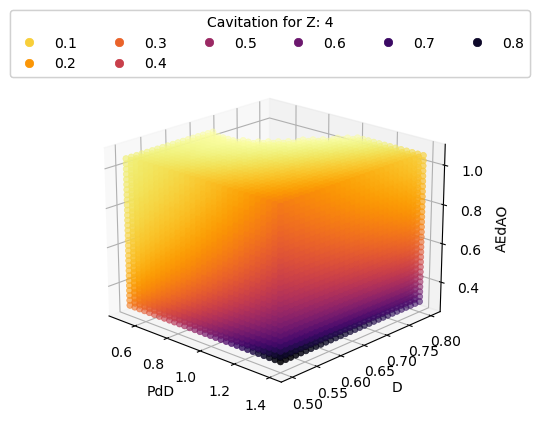

In [12]:
def show_P_B_graph(z, dfs_type, col_name):
    fig = plt.figure()
#     fig.set_figwidth(6)
#     fig.suptitle('Z: '+str(z))
    ax = plt.axes(projection='3d')
    df = dfs_type[z]
    if len(df) == 0:
        return
    
    # Data for three-dimensional scattered points
    xdata = list(df['PdD'])
    ydata = list(df['D'])
    zdata = list(df['AEdAO'])
    cdata = list(df[col_name])
    ax.set_xlabel('PdD')
    ax.set_ylabel('D')
    ax.set_zlabel('AEdAO')
    
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='cool', linewidth=0.5)
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='Accent', linewidth=0.5)
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='viridis_r', linewidth=0.5)
    g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='inferno_r', linewidth=0.5)
#     g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='gnuplot_r', linewidth=0.5)
    
    legend = ax.legend(*g.legend_elements(),
                       loc="upper center", borderaxespad=-3,
                       title=col_name+" for Z: "+str(z),
                       ncol=6) 
    ax.add_artist(legend);
    
    ax.view_init(20, -47)
#     ax.view_init(20, -135)
    

z = 4
# show_P_B_graph(z, dfs_velocity, 'Velocity')
show_P_B_graph(z, dfs_cavitation, 'Cavitation')
# show_P_B_graph(z, dfs_strenght, 'Strenght')

In [13]:
dfs[4]

,D,AEdAO,PdD,P_B,Strenght,Cavitation,Velocity
0,0.541379,0.30,0.500000,184.311107,-0.000670,0.246346,21.384009
1,0.541379,0.30,0.531034,183.187743,-0.000638,0.263958,19.504664
2,0.541379,0.30,0.562069,182.494018,-0.000607,0.281952,17.777164
3,0.541379,0.30,0.593103,182.235566,-0.000576,0.300234,16.191627
4,0.541379,0.30,0.624138,182.290967,-0.000545,0.318881,14.726618
...,...,...,...,...,...,...,...
26995,0.675862,1.05,1.275862,180.664964,-0.001512,0.117610,-12.221728
26996,0.675862,1.05,1.306897,182.192553,-0.001555,0.126925,-12.621235
26997,0.675862,1.05,1.337931,183.725142,-0.001604,0.136509,-13.003940
26998,0.675862,1.05,1.368966,185.237438,-0.001659,0.146817,-13.372188


In [14]:
dfs_P_B = {}

for z in dfs:
    dfs_P_B[z] = dfs[z].loc[(dfs[z]['Strenght'] <= 0) & (dfs[z]['Cavitation'] <= 0) & (dfs[z]['Velocity'] <= 0)]

In [15]:
dfs_P_B[4]

,D,AEdAO,PdD,P_B,Strenght,Cavitation,Velocity
9514,0.789655,0.791379,0.624138,140.356066,-0.002569,-0.003057,-0.313643
10024,0.789655,0.817241,0.624138,141.042714,-0.002560,-0.007232,-0.256593
10025,0.789655,0.817241,0.655172,140.410492,-0.002529,-0.004256,-1.607573
10026,0.789655,0.817241,0.686207,140.187407,-0.002497,-0.000991,-2.838499
10504,0.789655,0.843103,0.624138,141.749524,-0.002551,-0.011137,-0.196190
...,...,...,...,...,...,...,...
26887,0.717241,1.050000,0.717241,155.706055,-0.001872,-0.010099,-0.880748
26888,0.717241,1.050000,0.748276,155.315221,-0.001844,-0.007399,-2.115859
26889,0.717241,1.050000,0.779310,155.229157,-0.001818,-0.004421,-3.246241
26890,0.717241,1.050000,0.810345,155.382355,-0.001795,-0.000783,-4.285033


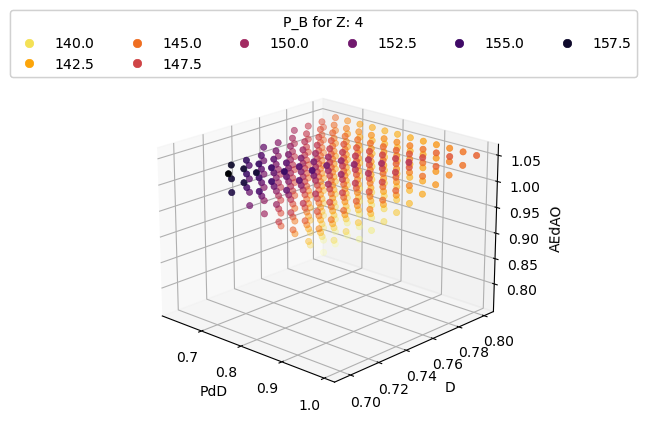

In [16]:
z = 4
show_P_B_graph(z, dfs_P_B, 'P_B')

In [17]:
df_all = pd.concat([dfs_P_B[z] for z in dfs_P_B], ignore_index=True)
# remove duplicates keeping the smaller P_B
df_all = df_all.sort_values(['P_B'], ascending=True)
df_all = df_all.drop_duplicates(['D', 'AEdAO', 'PdD'])

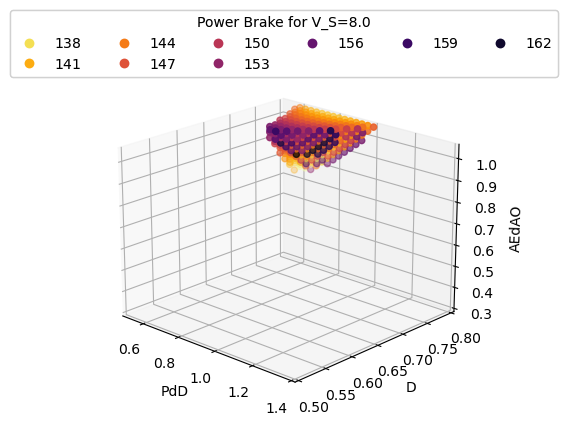

In [18]:
# Plot showing all the range of variables

fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
xdata = list(df_all['PdD'])
ax.set_xlabel('PdD')
ax.set_xlim(range_PdD)
ydata = list(df_all['D'])
ax.set_ylabel('D')
ax.set_ylim(range_D)
zdata = list(df_all['AEdAO'])
ax.set_zlabel('AEdAO')
ax.set_zlim(range_AEdAO)
# color data
cdata = list(df_all['P_B'])

g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='inferno_r');
# ax.set_facecolor("gray")

legend = ax.legend(*g.legend_elements(),
                   loc="upper center", borderaxespad=-3,
                   title="Power Brake for V_S="+V_S[0]+'.'+V_S[2],
                   ncol=6) 
ax.add_artist(legend);

ax.view_init(20, -47)
# ax.view_init(20, -135)

With zoom


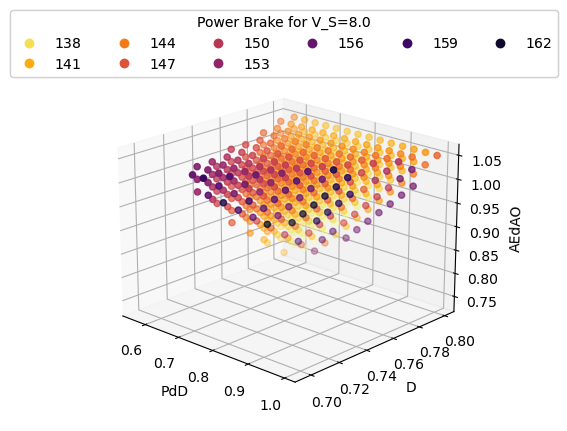

In [19]:
print("With zoom")

fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
xdata = list(df_all['PdD'])
ax.set_xlabel('PdD')
ydata = list(df_all['D'])
ax.set_ylabel('D')
zdata = list(df_all['AEdAO'])
ax.set_zlabel('AEdAO')
# color data
cdata = list(df_all['P_B'])

g = ax.scatter3D(xdata, ydata, zdata, c=cdata, cmap='inferno_r');
# ax.set_facecolor("gray")

legend = ax.legend(*g.legend_elements(),
                   loc="upper center", borderaxespad=-3,
                   title="Power Brake for V_S="+V_S[0]+'.'+V_S[2],
                   ncol=6) 
ax.add_artist(legend);

ax.view_init(20, -47)
# ax.view_init(20, -135)